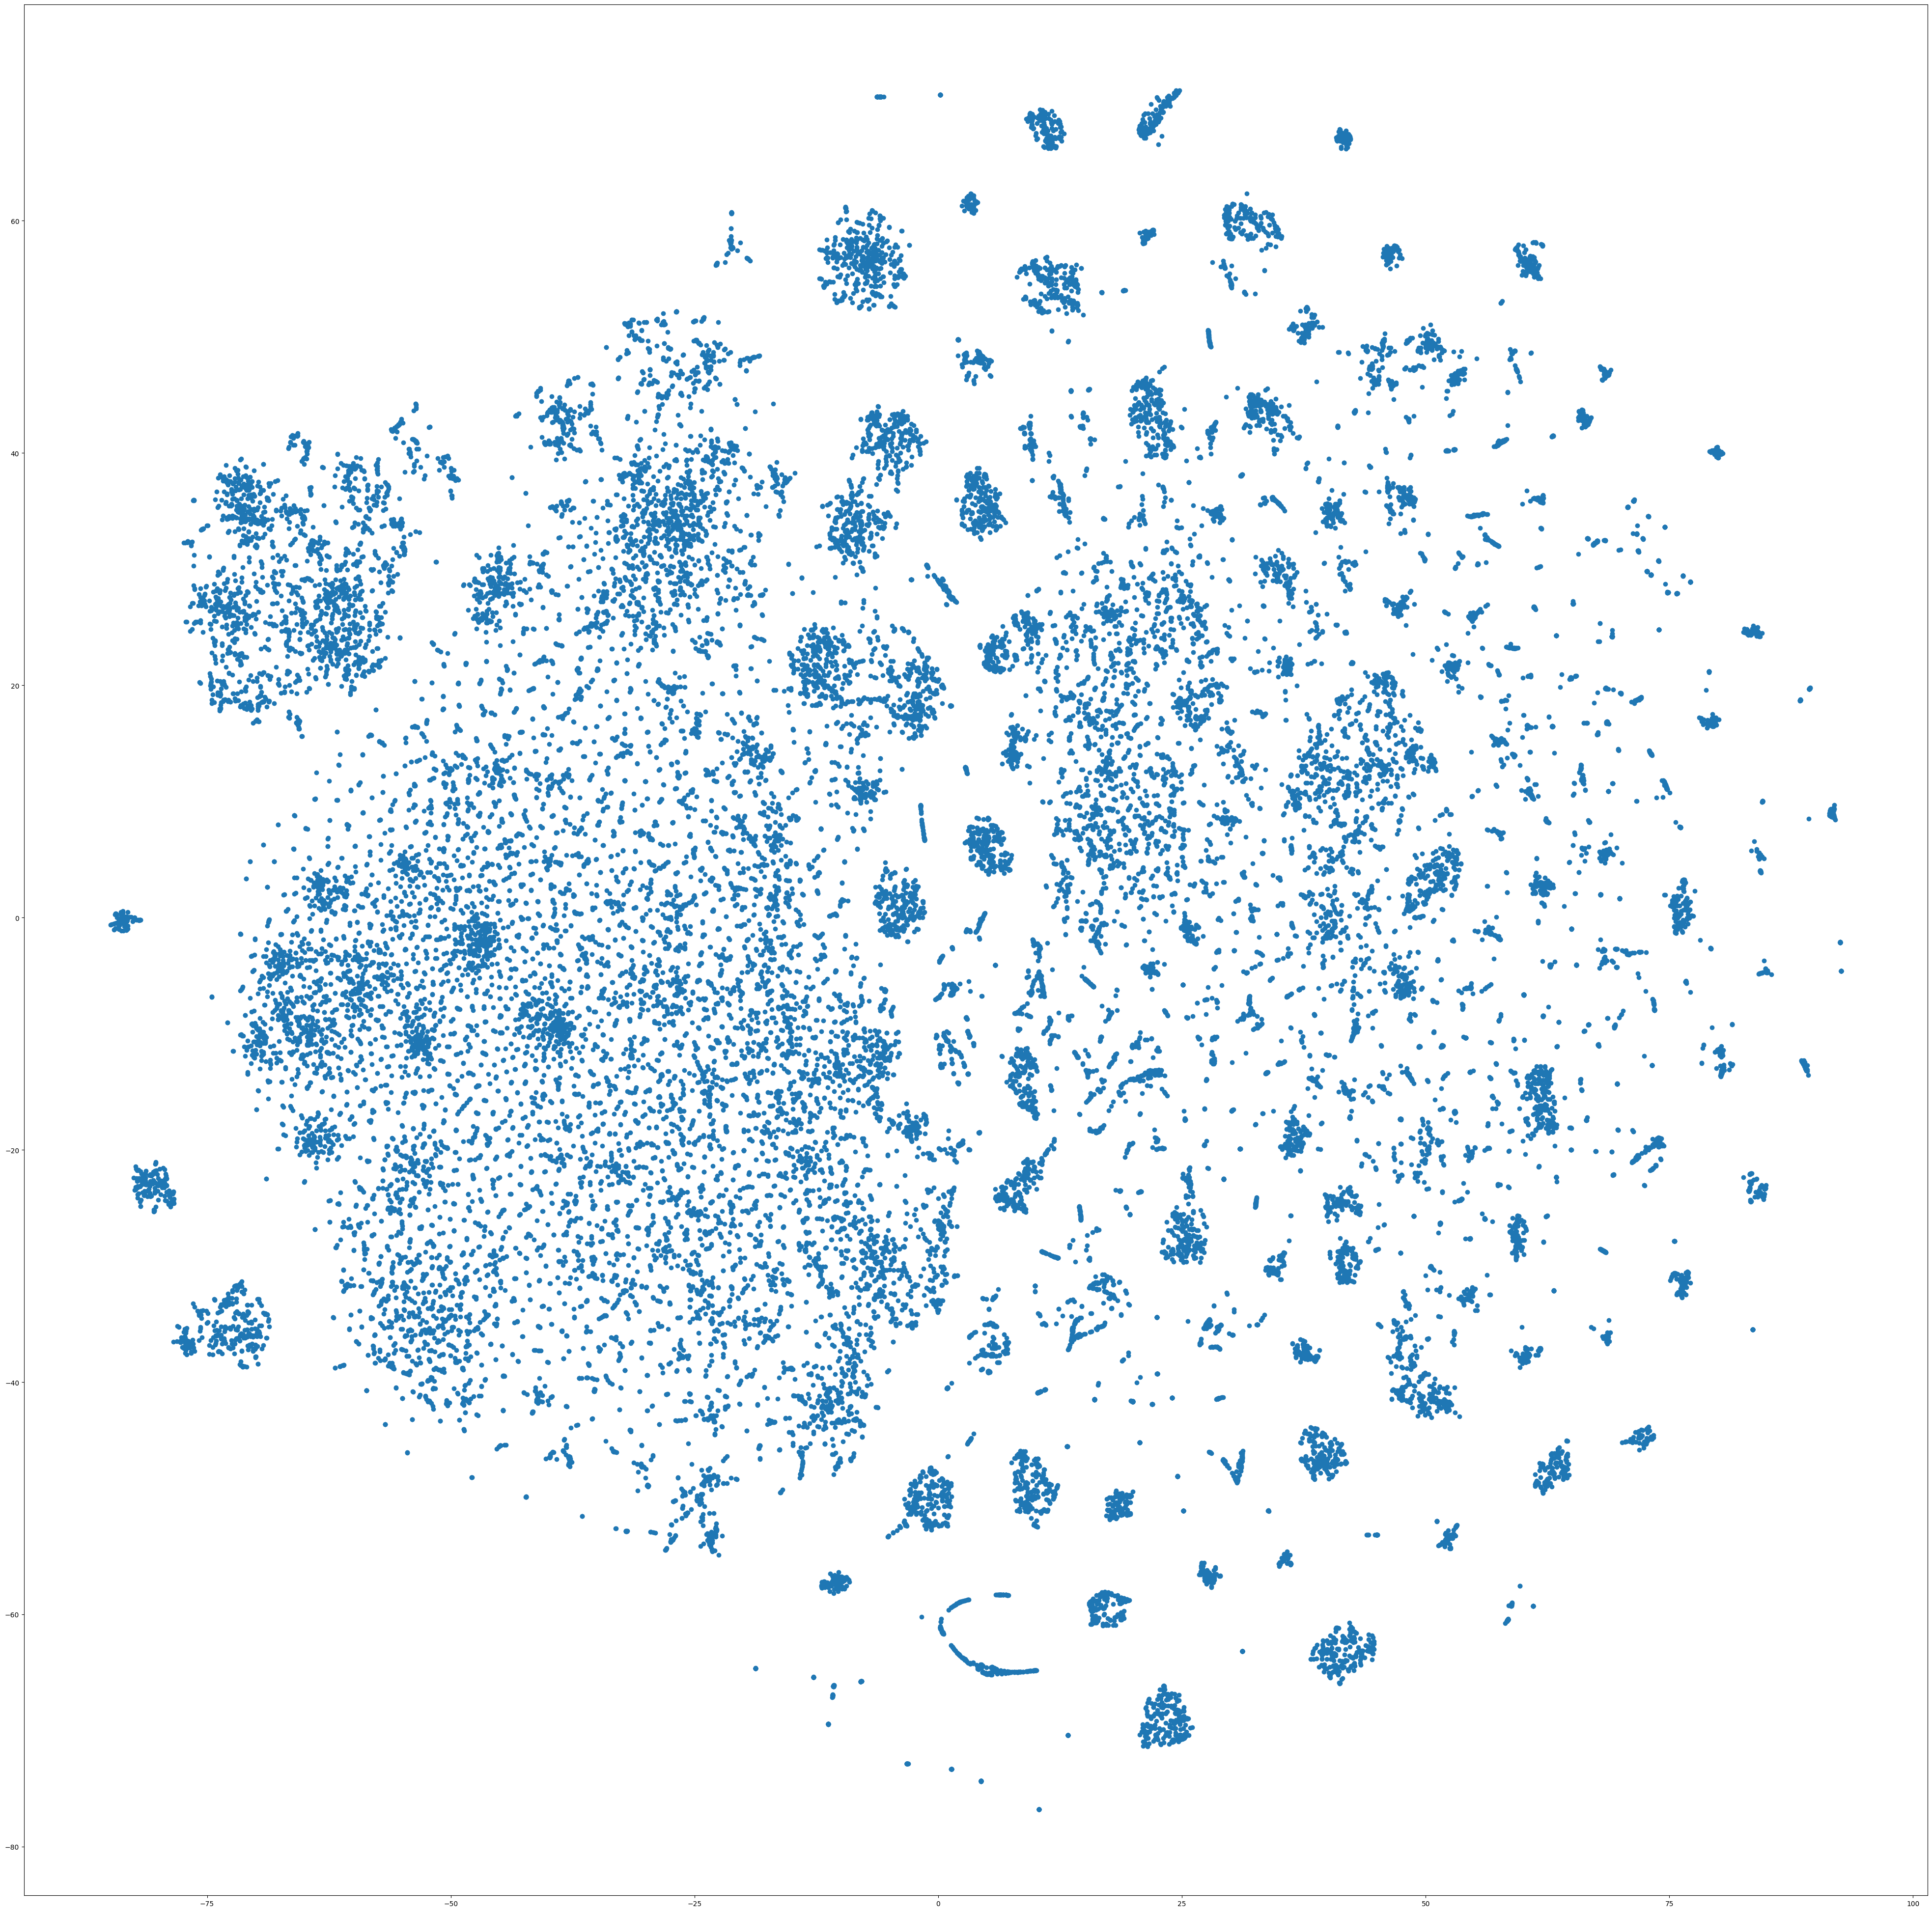

In [147]:
import numpy as np
Y = np.load("./datasets/2d_emb_gbt.npy")
kmeans_num_classes = 2000
target_num_classes = 220

import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.scatter(Y[:, 0], Y[:, 1])
plt.savefig("./datasets/gbtembs"+".png")



In [138]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
detector = LocalOutlierFactor(n_neighbors=5, contamination=0.08)
scores = detector.fit_predict(Y)

print(len(Y))
first_drop = []

for i in range(len(scores)):
    if scores[i] > 0:
        first_drop.append(Y[i])

Y = np.array(first_drop)
print(len(Y))

33715
31017


In [139]:
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

all_embeddings = Y
clustering_model = KMeans(n_clusters=kmeans_num_classes)
clustering_model.fit(all_embeddings)
cluster_assignment = clustering_model.labels_
true_labels = []
pred_labels = cluster_assignment   
print("all_embeddings:{}, true_labels:{}, pred_labels:{}".format(all_embeddings.shape, len(true_labels), len(pred_labels)))



all_embeddings:(31017, 2), true_labels:0, pred_labels:31017


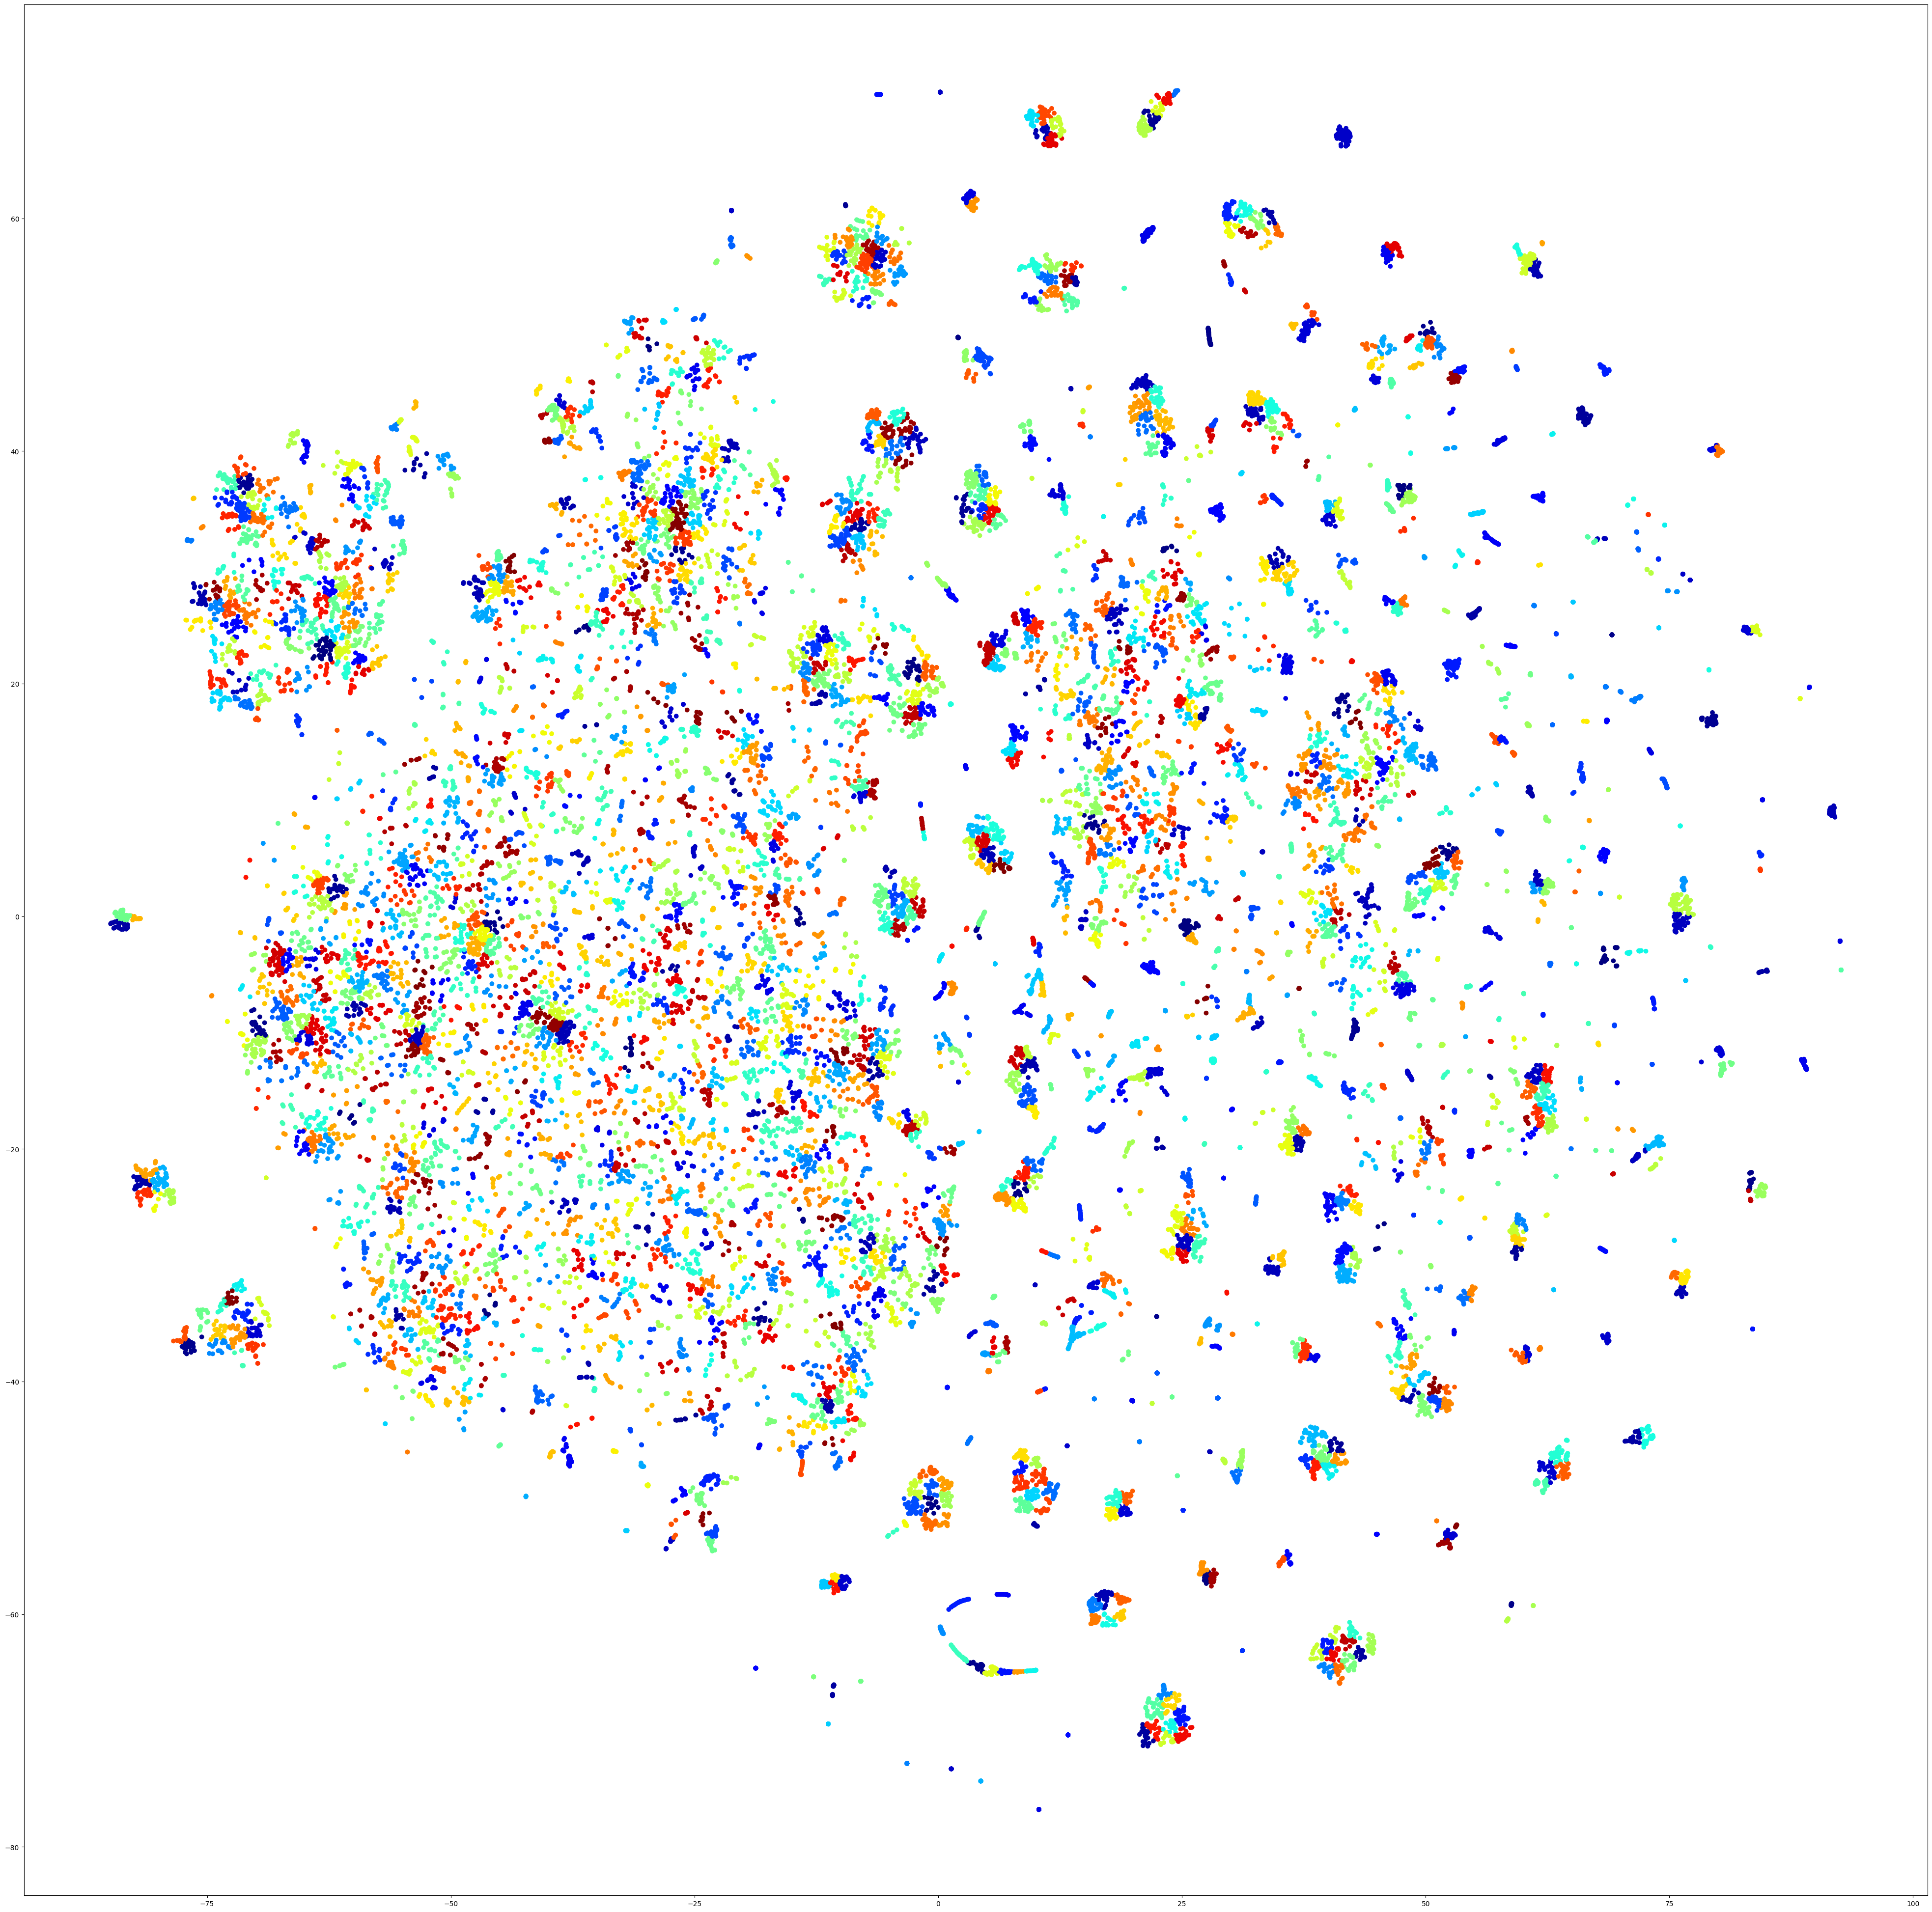

In [140]:
import matplotlib
plt.figure(figsize=(50,50))
plt.scatter(Y[:, 0], Y[:, 1],c=pred_labels, cmap=matplotlib.cm.jet)
plt.savefig("./datasets/gbtkmeans"+str(kmeans_num_classes)+".png")

谱聚类

In [141]:
clusters = clustering_model.cluster_centers_
np.save("./datasets/gbt2d1000kmeans", clusters)


In [142]:
# from sklearn.cluster import SpectralClustering
# hi_result = SpectralClustering(n_clusters=target_num_classes, affinity="nearest_neighbors").fit_predict(clusters)

# last_label = []
# for label in pred_labels:
#     last_label.append(hi_result[label])

# import matplotlib
# plt.figure(figsize=(50,50))
# plt.scatter(Y[:, 0], Y[:, 1],c=last_label, cmap=matplotlib.cm.jet)
# plt.savefig("./datasets/gbtkmeans"+str(kmeans_num_classes)+"pu"+str(target_num_classes)+".png")


In [143]:
# second drop 
pre = []
for i in range(len(clusters)):
    pre.append(0)
for i in range(len(pred_labels)):
    pre[pred_labels[i]] = pre[pred_labels[i]]+1

print(min(pre))
print(max(pre))

single = 2000+88
map = {}
new_clusters = []
for i in range(len(pre)):
    if pre[i] > 20:
        map[i] = len(new_clusters)
        new_clusters.append(clusters[i])
    else:
        map[i] = single+1
        single = single+1
new_clusters = np.array(new_clusters)
print(len(new_clusters))
print(len(clusters))


2
60
461
2000


<Figure size 640x480 with 0 Axes>

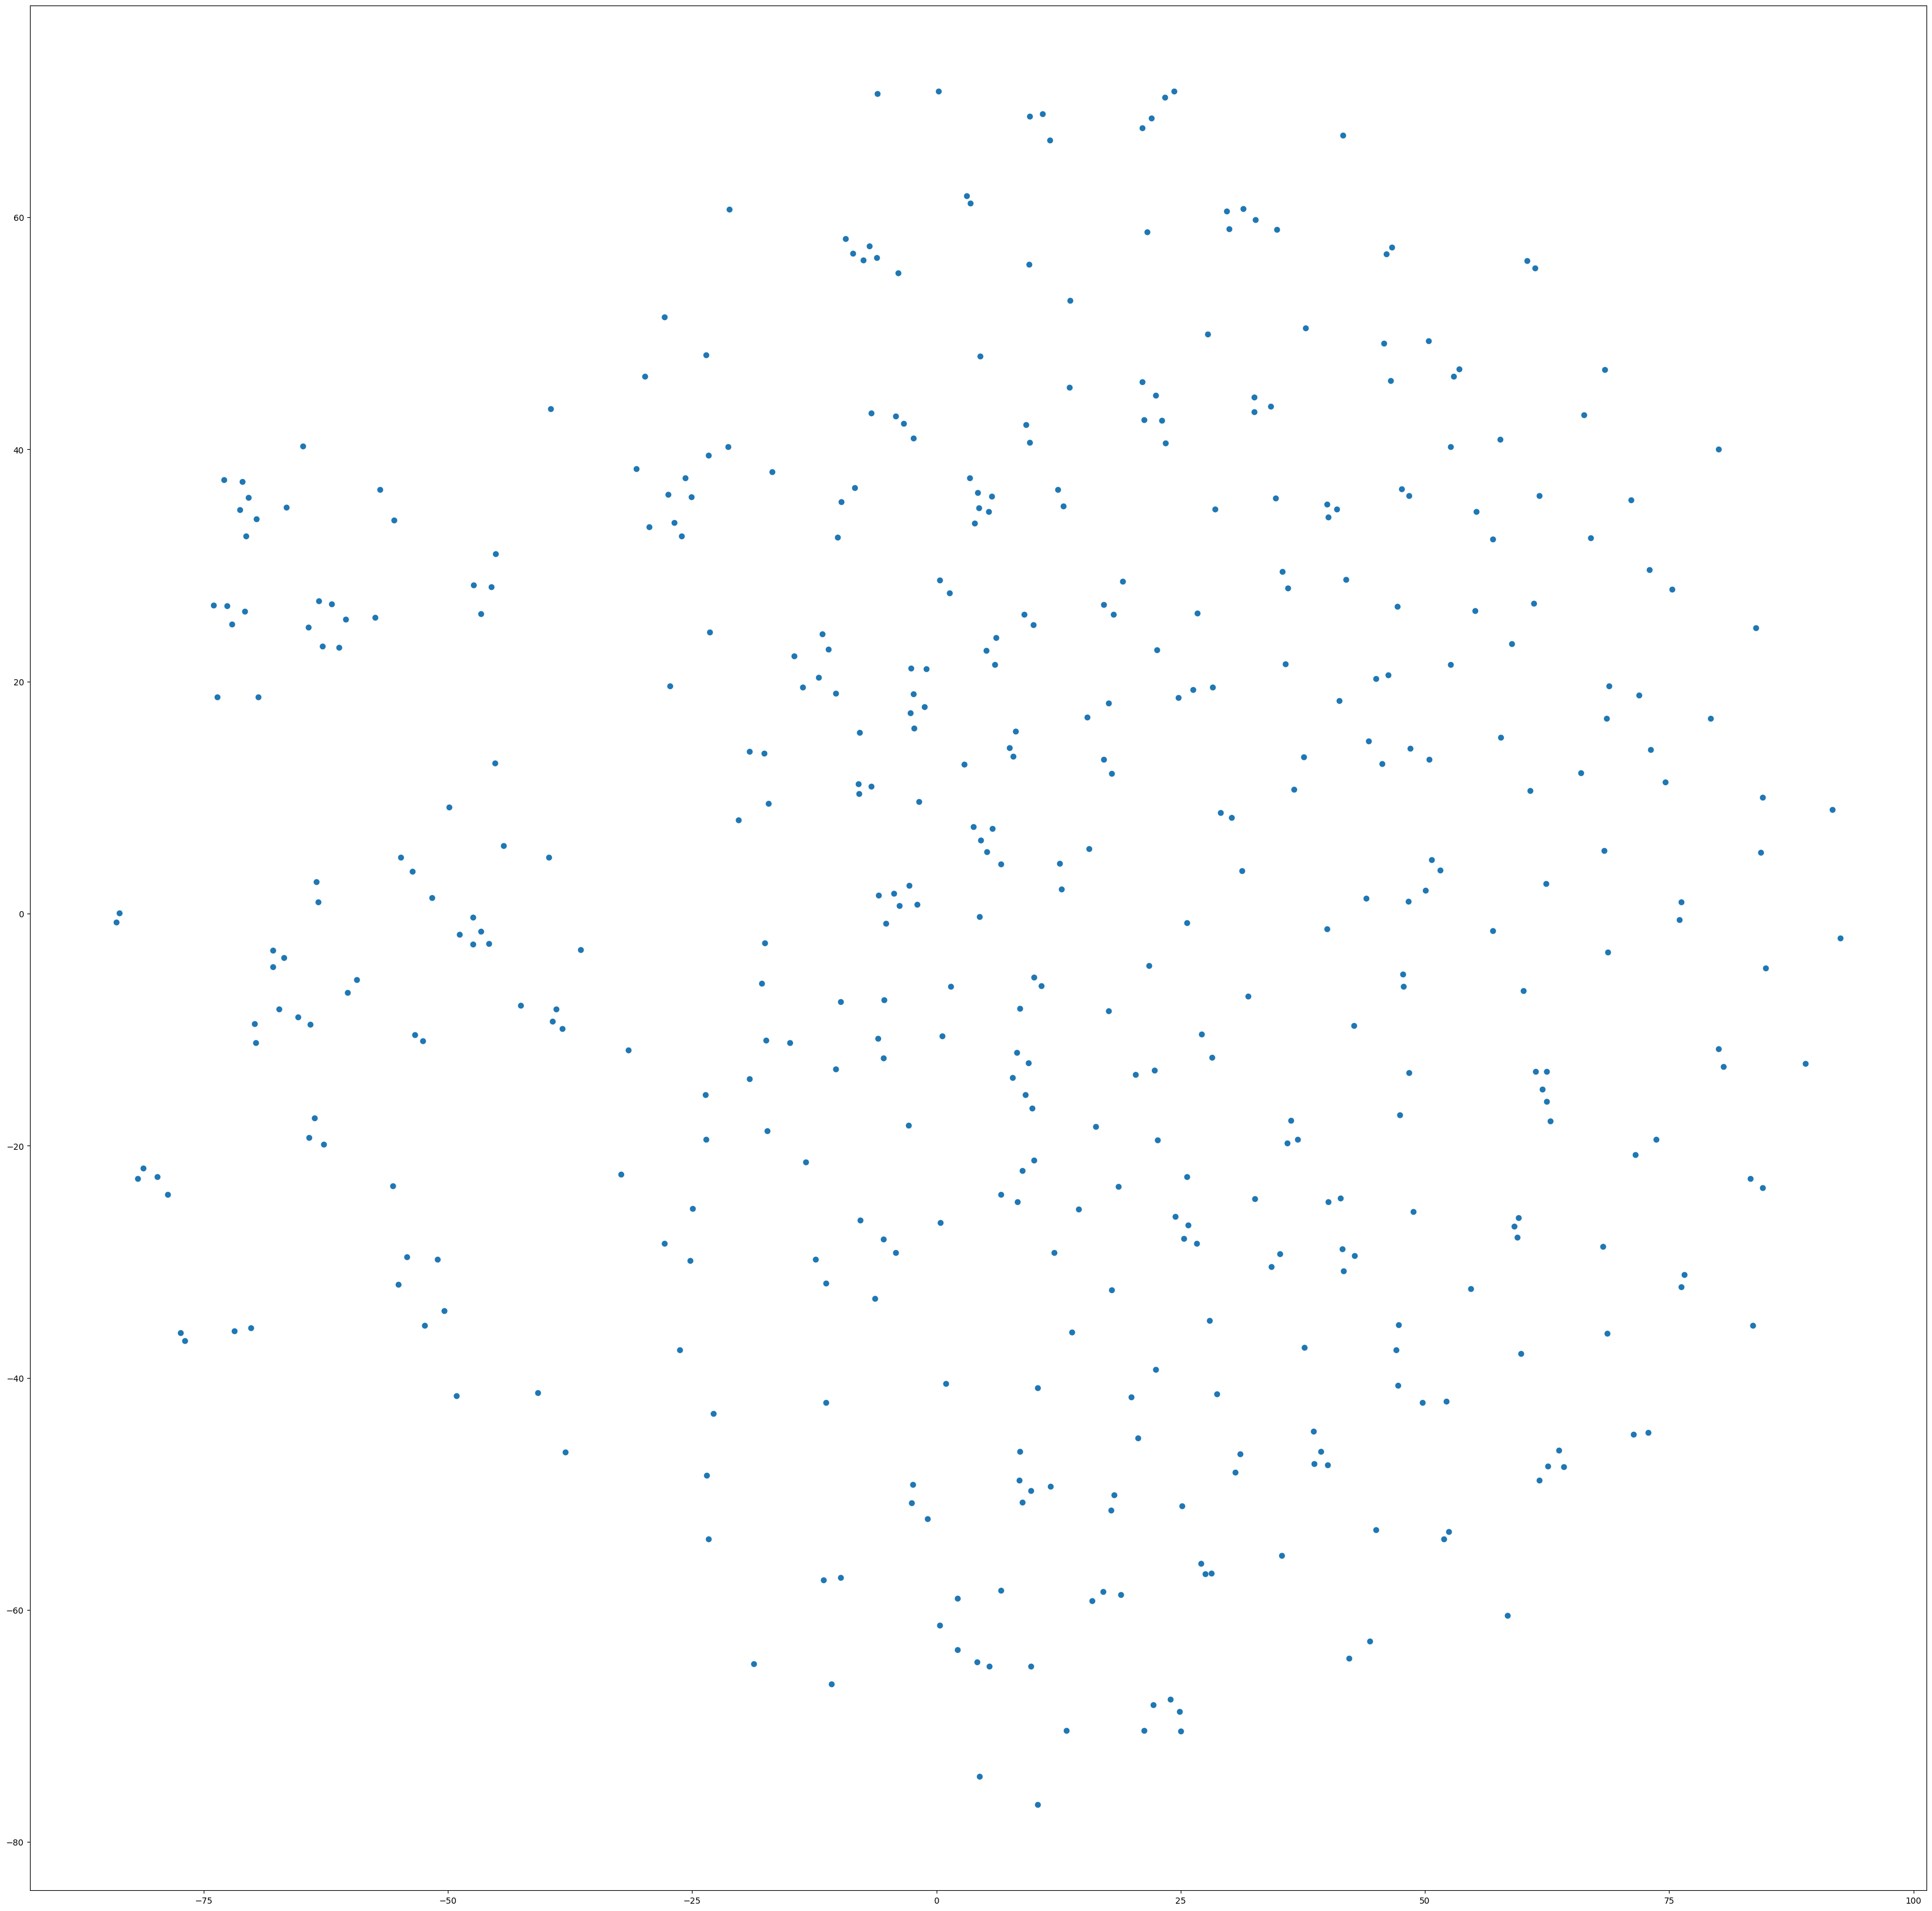

In [144]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt
Z = linkage(new_clusters, 'single')
f = fcluster(Z,80,'distance')
plt.clf()
fig = plt.figure(figsize=(40, 40))
plt.scatter(new_clusters[:, 0], new_clusters[:, 1])
plt.savefig("gbtkmeans1000clusterafterdrop")

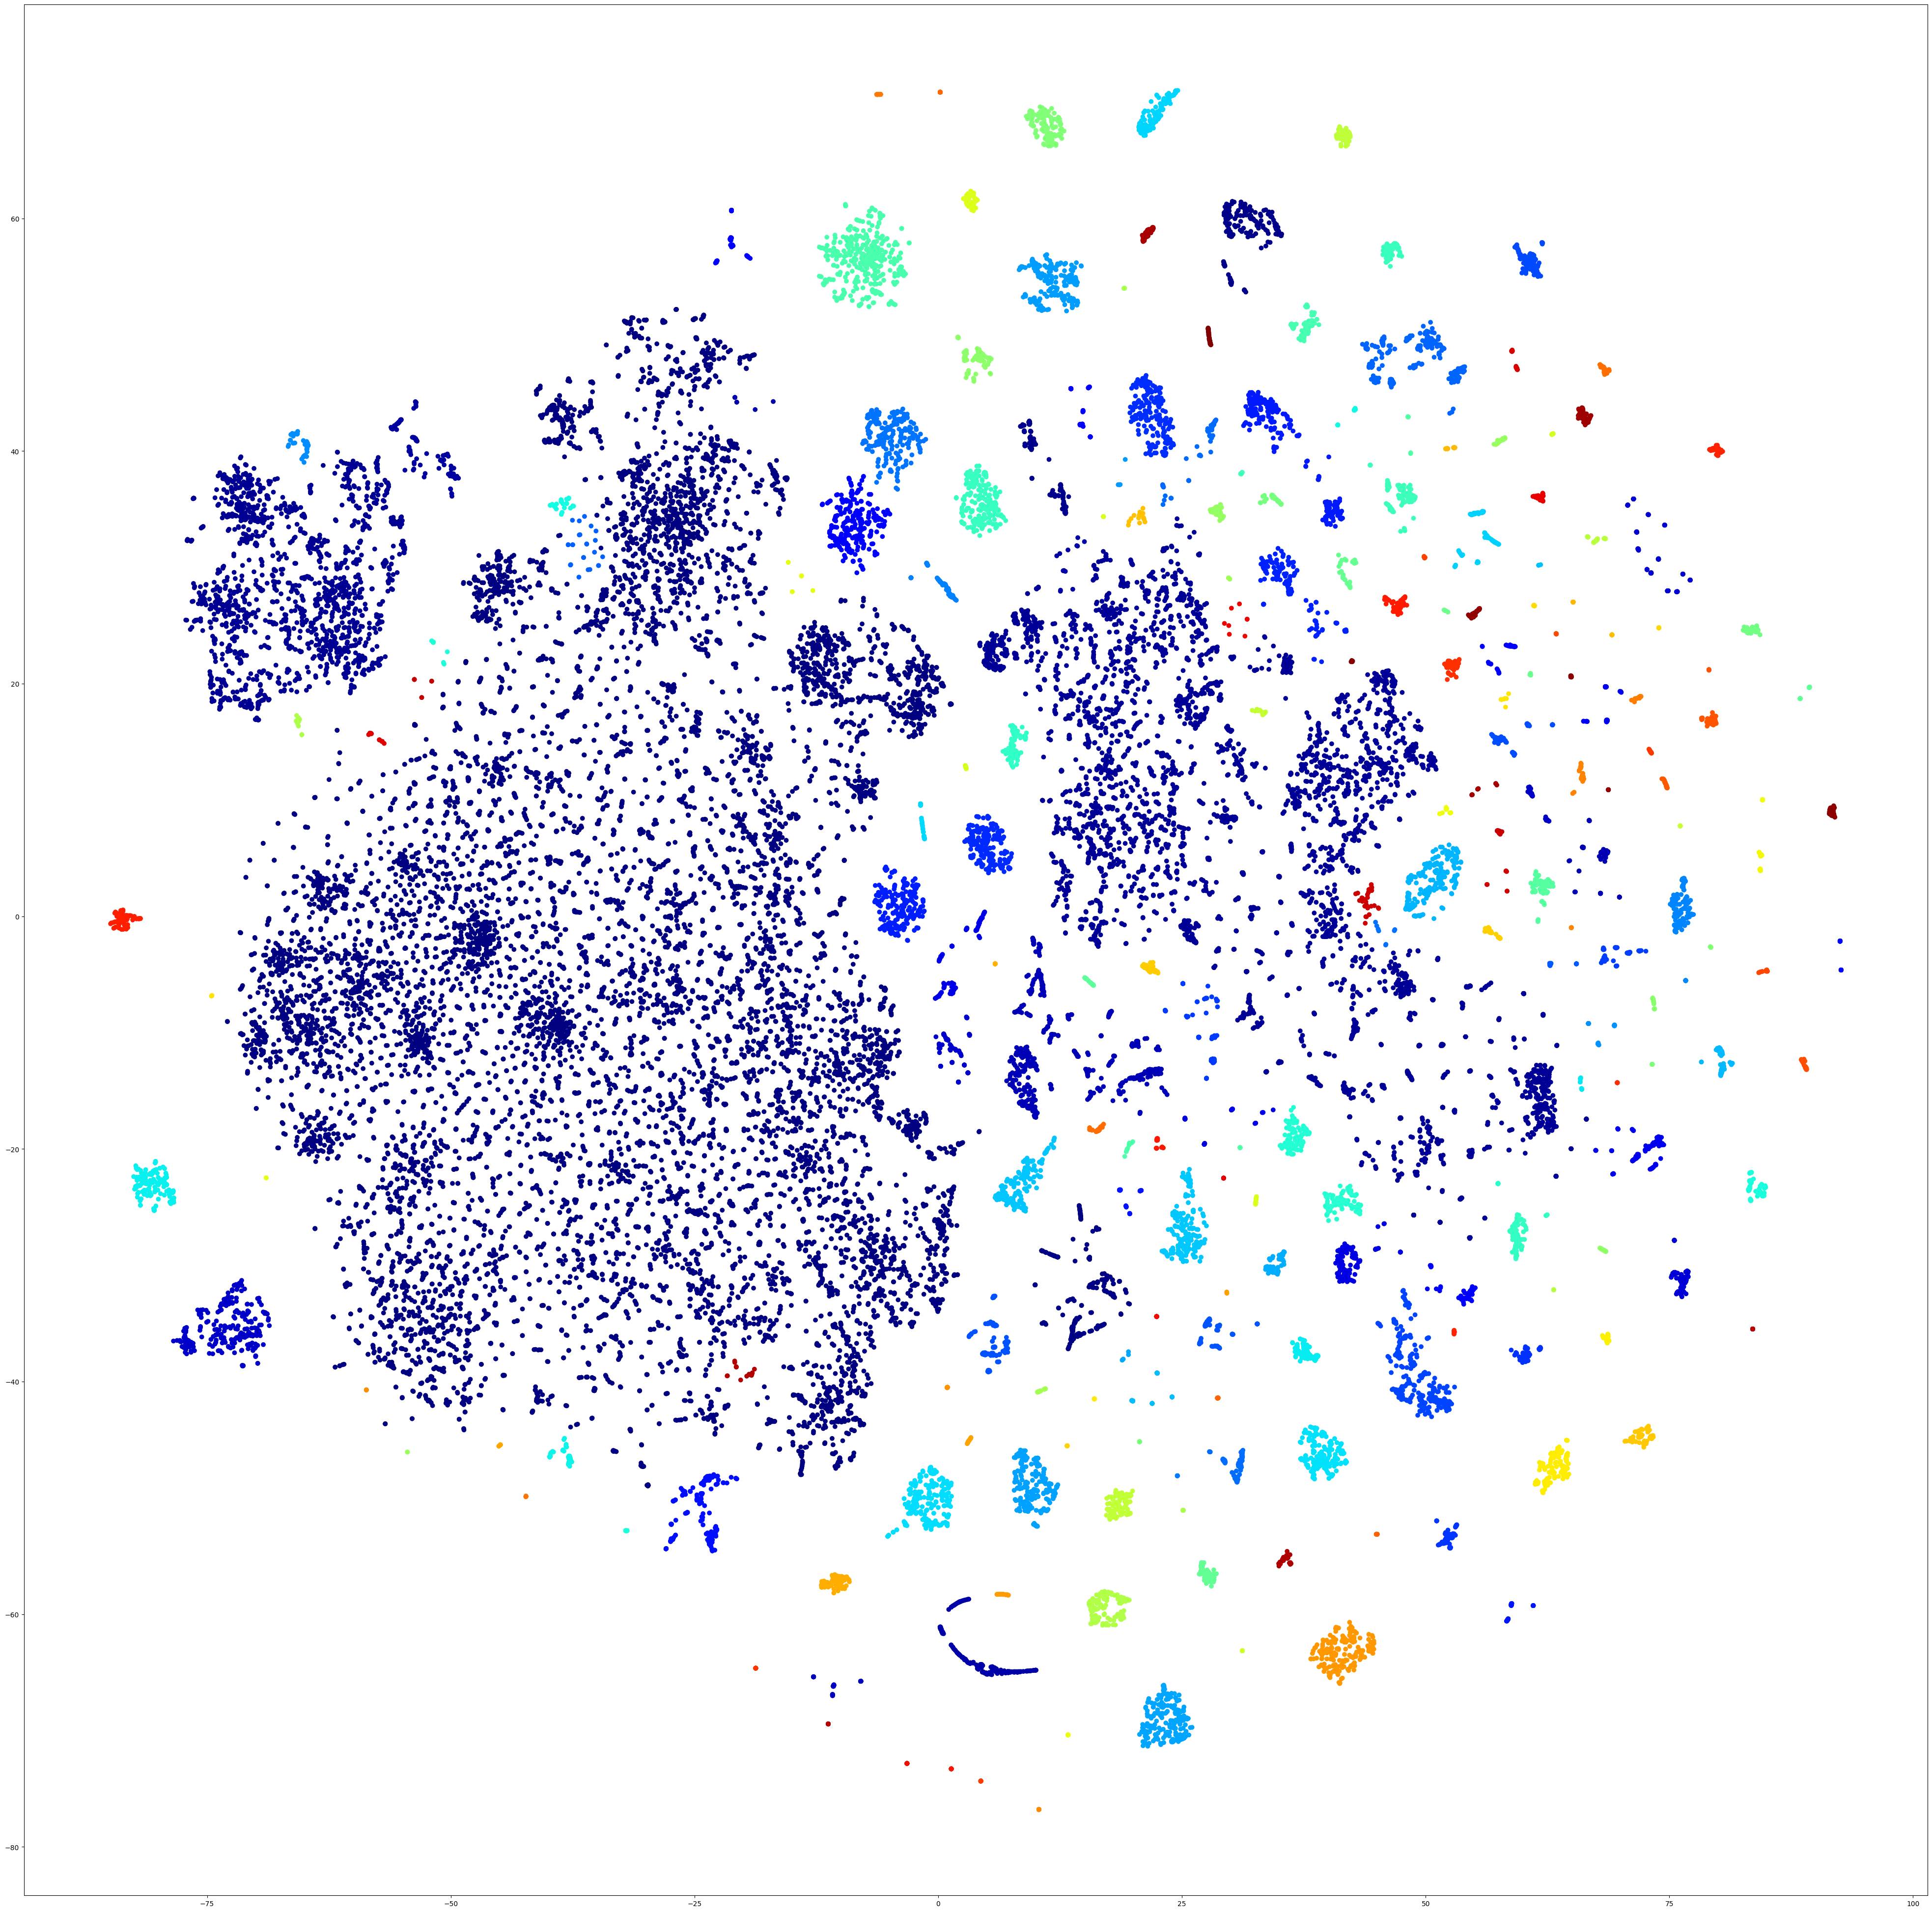

In [145]:
from sklearn.cluster import AgglomerativeClustering
hicluster = AgglomerativeClustering(n_clusters=target_num_classes, affinity='euclidean', linkage='single')  
hi_result = hicluster.fit_predict(clusters)

# result = []
# for i in range(len(clusters)):
#     result.append(i)

# for i in range(len(hi_result)):
#     result[map[i]] = hi_result[i]

# last_label = []
# for label in pred_labels:
#     if map[label] < len(new_clusters):
#         last_label.append(hi_result[map[label]])
#     else:
#         last_label.append(map[label]-2000)

last_label = []
for label in pred_labels:
    last_label.append(hi_result[label])

# print(last_label)
import matplotlib
plt.figure(figsize=(50,50))
plt.scatter(Y[:, 0], Y[:, 1],c=last_label, cmap=matplotlib.cm.jet)
plt.savefig("./datasets/gbtkmeans"+str(kmeans_num_classes)+"hi"+str(target_num_classes)+"result.png")


In [146]:
import langid
import jsonlines
from tqdm import tqdm
with jsonlines.open("./datasets/drop_gbtsinglekmeans"+str(kmeans_num_classes)+"hi"+str(target_num_classes)+'.jsonl', 'w') as cf:
    with jsonlines.open('./datasets/ift_cluster_given_fudandm2023.jsonl', 'r') as rf:
        print("add label")
        j = 0
        single_label = 300
        for index,data in tqdm(enumerate(rf)):
            if scores[index] > 0:
                label = last_label[j]
                j = j+1
            else:
                label = single_label
                single_label = single_label+1
            write = data
            write['label'] = str(label)
            cf.write(write)


add label


33715it [00:00, 38288.81it/s]
